<a href="https://colab.research.google.com/github/anujdutt9/Deep-Learning-TF-2.0/blob/master/TF_2_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.1
import tensorflow as tf
tf.__version__

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.1`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


'2.1.0'

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load the Dataset File
from google.colab import files
uploaded = files.upload()

In [4]:
!ls

moore.csv  sample_data


In [5]:
!head moore.csv

1971,2300
1972,3500
1973,2500
1973,2500
1974,4100
1974,4500
1974,8000
1975,3510
1976,5000
1976,8500


In [6]:
# Load the Dataset
df = pd.read_csv('moore.csv', header=None).values
df[:10]

array([[1971, 2300],
       [1972, 3500],
       [1973, 2500],
       [1973, 2500],
       [1974, 4100],
       [1974, 4500],
       [1974, 8000],
       [1975, 3510],
       [1976, 5000],
       [1976, 8500]])

In [7]:
# Features
X = df[:,0].reshape(-1,1)
X.shape

(162, 1)

In [8]:
# Labels
y = df[:,1]
y.shape

(162,)

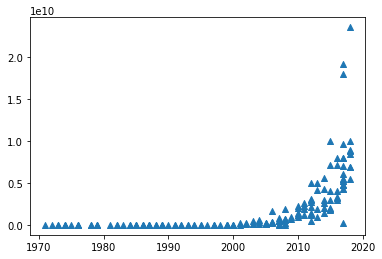

In [9]:
# Plot the Dataset
plt.scatter(X,y,marker='^')

In [10]:
# The dataset is exponential. Since we want the linear dataset, we take the log of the datase
y = np.log(y)
y.shape

(162,)

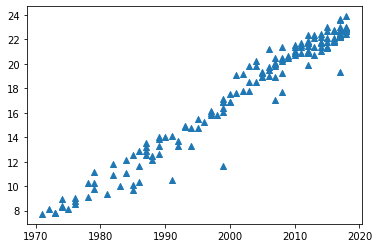

In [11]:
# Plot the dataset again
plt.scatter(X,y,marker='^')

In [0]:
# Center the X data i.e. years so that values are not too large
X = X - X.mean()

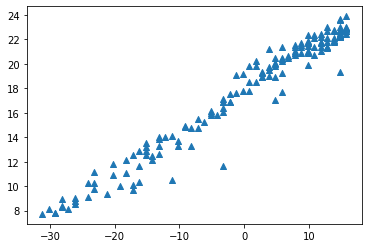

In [13]:
# Plot the dataset again
plt.scatter(X,y,marker='^')

In [14]:
# Built the Model
model = tf.keras.Sequential([
                             tf.keras.layers.Input(shape=(1,)),
                             tf.keras.layers.Dense(1)
])

# Print Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Compile the Model with SGD Optimizer and MSE Loss
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9), loss='mse')

In [0]:
# Learning Rate Scheduler
def scheduleLR(epoch, lr):
  # Change Learning Rate based on Epochs
  if (epoch >= 50):
    return 0.0001
  return 0.001

# LR Scehduler
lr_scheduler= tf.keras.callbacks.LearningRateScheduler(scheduleLR)

In [17]:
# Train the Model with Learning Rate Scheduler passed in as a callback function
# A callback is a set of functions to be applied at given stages of the training procedure. 
# You can use callbacks to get a view on internal states and statistics of the model during training
hist = model.fit(x=X, y=y, epochs=200, callbacks=[lr_scheduler], verbose=1)

Train on 162 samples
Epoch 1/200
162/162 [==============================] - 0s 1ms/sample - loss: 313.4498
Epoch 2/200
162/162 [==============================] - 0s 95us/sample - loss: 288.5426
Epoch 3/200
162/162 [==============================] - 0s 69us/sample - loss: 261.2619
Epoch 4/200
162/162 [==============================] - 0s 75us/sample - loss: 337.9152
Epoch 5/200
162/162 [==============================] - 0s 74us/sample - loss: 393.1842
Epoch 6/200
162/162 [==============================] - 0s 79us/sample - loss: 248.3267
Epoch 7/200
162/162 [==============================] - 0s 76us/sample - loss: 193.1838
Epoch 8/200
162/162 [==============================] - 0s 79us/sample - loss: 149.8097
Epoch 9/200
162/162 [==============================] - 0s 82us/sample - loss: 145.8049
Epoch 10/200
162/162 [==============================] - 0s 75us/sample - loss: 142.8491
Epoch 11/200
162/162 [==============================] - 0s 71us/sample - loss: 183.9190
Epoch 12/200
162/162 

In [18]:
# History Keys
hist.history.keys()

dict_keys(['loss', 'lr'])

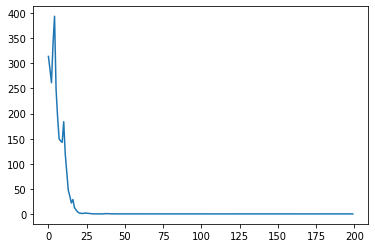

In [19]:
# Training Loss
plt.plot(hist.history['loss'], label='Loss')

In [20]:
# Ger the slope of the line
# Slope of the line is related to doubling rate of the transistors as per the Moore's Law
print(model.layers)
# Returns two values, weight and a bias value
print(model.layers[0].get_weights())

[array([[0.3217571]], dtype=float32), array([17.764511], dtype=float32)]


In [21]:
# Slope of the line is
a = model.layers[0].get_weights()[0][0,0]
a

0.3217571

In [22]:
b = model.layers[0].get_weights()[1][0]
b

17.764511

In [23]:
# Amount of time for the number of transistors to double
print('Time to double: ', np.log(2)/a)

Time to double:  2.154256000516692


In [0]:
# Plot the Best Fit line to Dataset
def plot_best_fit_line(a, X, y, b):
  y_hat = a*X + b
  fig,ax = plt.subplots(figsize=(20,10))
  ax.scatter(X,y, marker='^')
  ax.set_xlabel('X')
  ax.set_ylabel('y')
  ax.plot(X,y_hat,c='r')
  ax.set_title('Line fit to Input Data')

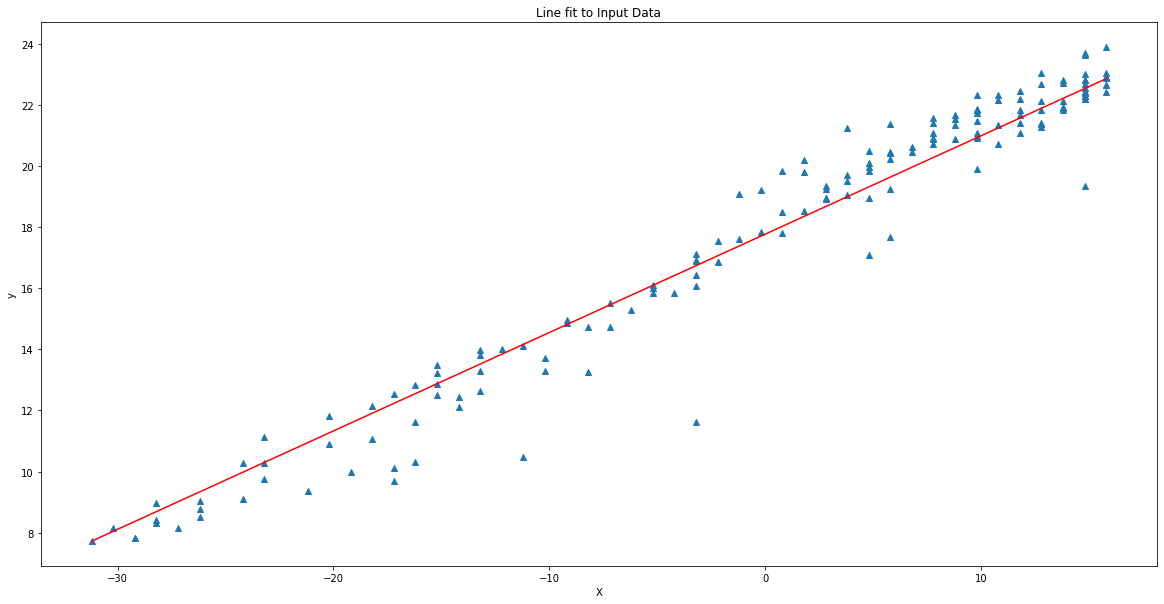

In [25]:
plot_best_fit_line(a, X, y, b)

In [26]:
# Analytical Solution
X = np.array(X).flatten()
y = np.array(y)
denominator = X.dot(X) - X.mean() * X.sum()
a = (X.dot(y) - y.mean()*X.sum()) / denominator
b = (y.mean() * X.dot(X) - X.mean()) / denominator
print('Weight: {0}\t Bias: {1}'.format(a, b))
print('Time to Double: ', np.log(2)/a)

Weight: 0.341682487387313	 Bias: 17.76493939363179
Time to Double:  2.0286295205239204


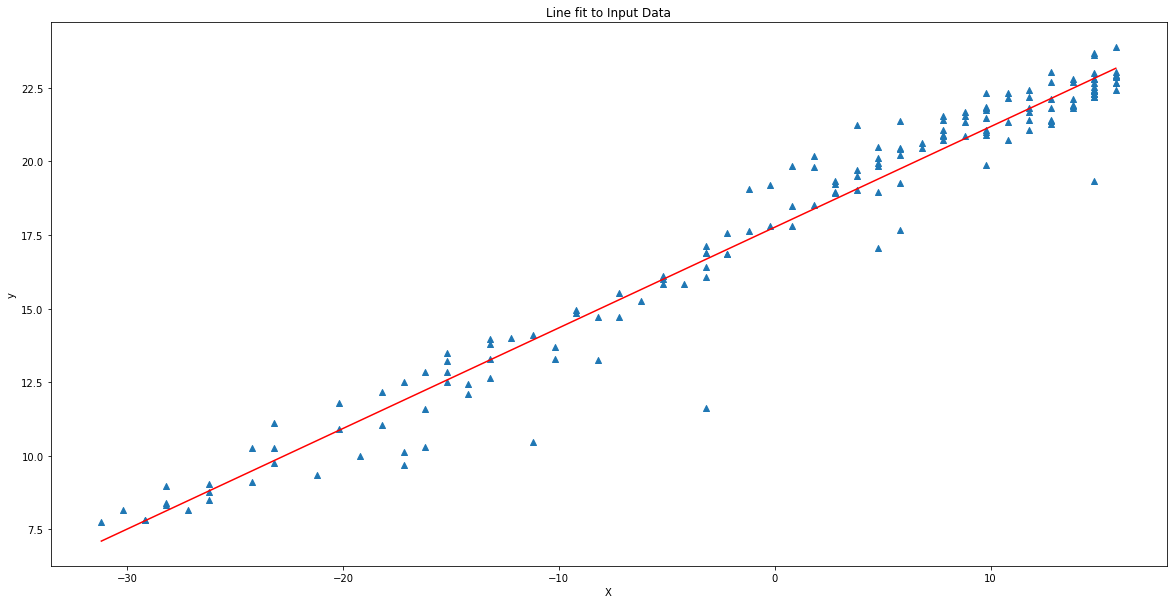

In [27]:
plot_best_fit_line(a, X, y, b)